In [65]:
import scipy
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import io
from filedata import *

In [3]:
#open the file (ObsID 1131709192)

data = openFile('diffuse_survey_source_arrays/1131709192_source_array.sav')

In [4]:
print data['source_array'][0]['ra']

343.274


In [38]:
#this step changes the ra range from [0,360] to [-180,180]

for i in range(len(data['source_array'])):
    if data['source_array'][i]['ra'] > 180: 
        data['source_array'][i]['ra'] -= 360                                                                                

for i in range(len(data['source_array'])):
    if data['source_array'][i]['extend'] is not None:            
        for j in range(len(data['source_array'][i]['extend'])):
            if data['source_array'][i]['extend'][j]['ra'] > 180:
                data['source_array'][i]['extend'][j]['ra'] -= 360
                    

In [74]:
data['source_array'][0]['flux']['i'][0]

23.921383

In [43]:
# this lists the element numbers of the data points outside the main group

for i in range(len(data['source_array'])):
    if (data['source_array'][i]['dec'] > -23) or (data['source_array'][i]['ra'] > 0):
        print 'element number =',i
        if data['source_array'][i]['extend'] == None:
            print 'This extended object has 0 components'
        else:
            print 'This extended object has ',len(data['source_array'][i]['extend']),'components.'
        print 'flux array: ',data['source_array'][i][-1][0]
        print 'dec = ',data['source_array'][i]['dec']
        print 'ra = ',data['source_array'][i]['ra']
        print '\n'
    

element number = 99
This extended object has  2 components.
flux array:  (0.0, 0.0, 0j, 0j, 3.770411252975464, 0.0, 0.0, 0.0)
DEC =  -12.6464
RA =  -30.8291


element number = 137
This extended object has  2 components.
flux array:  (0.0, 0.0, 0j, 0j, 3.2609870433807373, 0.0, 0.0, 0.0)
DEC =  -50.2067
RA =  13.7163


element number = 256
This extended object has  3 components.
flux array:  (0.0, 0.0, 0j, 0j, 1.97208571434021, 0.0, 0.0, 0.0)
DEC =  -12.8656
RA =  -29.1225


element number = 274
This extended object has  18 components.
flux array:  (0.05768635869026184, 0.05227304995059967, 0j, 0j, 2.2695701122283936, 0.0, 0.0, 0.0)
DEC =  -18.8209
RA =  -25.841


element number = 482
This extended object has  2 components.
flux array:  (0.0, 0.0, 0j, 0j, 1.1406759023666382, 0.0, 0.0, 0.0)
DEC =  -46.92
RA =  13.6921


element number = 508
This extended object has  2 components.
flux array:  (0.0, 0.0, 0j, 0j, 1.6724956035614014, 0.0, 0.0, 0.0)
DEC =  -15.0553
RA =  -31.4417


element nu

/home/champ8/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [244]:
#This separates the data into primary and outside data points.
#The outside sources have ra values greater than 0 degrees, or
#dec values greater than -23 degrees.
primary = []
outside = []
primary_xx = []
outside_xx = []
primary_yy = []
outside_yy = []
primary_I = []
outside_I = []
primary_ra = []
outside_ra = []
primary_dec = []
outside_dec = []

for i in range(len(data['source_array'])):
    if (data['source_array'][i]['dec'] > -23) or (data['source_array'][i]['ra'] > 0):
        outside.append(data['source_array'][i])
        outside_xx.append(data['source_array'][i]['flux']['xx'][0])
        outside_yy.append(data['source_array'][i]['flux']['yy'][0])
        outside_I.append(data['source_array'][i]['flux']['i'][0])
        outside_ra.append(data['source_array'][i]['ra'])
        outside_dec.append(data['source_array'][i]['dec'])
    else:
        primary.append(data['source_array'][i])
        primary_xx.append(data['source_array'][i]['flux']['xx'][0])
        primary_yy.append(data['source_array'][i]['flux']['yy'][0])
        primary_I.append(data['source_array'][i]['flux']['i'][0])
        primary_ra.append(data['source_array'][i]['ra'])
        primary_dec.append(data['source_array'][i]['dec'])
        
xx_range = (min(primary_xx + outside_xx),max(primary_xx + outside_xx))
yy_range = (min(primary_yy + outside_yy),max(primary_yy + outside_yy))
I_range = (min(primary_I + outside_I),max(primary_I + outside_I))
ra_range = (min(primary_ra + outside_ra),max(primary_ra + outside_ra))
dec_range = (min(primary_dec + outside_dec),max(primary_dec + outside_dec))

In [239]:
fig = plt.figure(figsize=(20,40))
plt.suptitle('ObsID 1131709192')

#Create the subplots.
#There are 5 rows: (xx, yy, Stokes I, ra, and dec), and 2 columns: 
#(Outside primary field (the weird points), Inside primary field).

#subplot1
plt.subplot2grid((5,2), (0,0))  
plt.hist(primary_xx,bins=10000,range=xx_range,align='mid',color='blue')
plt.title('Histogram - Primary XX')
plt.xlabel('XX')
plt.ylabel('count)')
plt.grid(True)

#subplot2
plt.subplot2grid((5,2), (0,1),)  
plt.hist(outside_xx,bins=300,range=xx_range,align='mid',color='red')
plt.title('Histogram - Outside XX')
plt.ylabel('count')
plt.xlabel('XX')

plt.grid(True)

#subplot3
plt.subplot2grid((5,2), (1,0))  
plt.hist(primary_yy,bins=10000,range=yy_range,align='mid',color='blue')
plt.title('Histogram - Primary YY')
plt.xlabel('YY')
plt.ylabel('count')
plt.grid(True)

#subplot4
plt.subplot2grid((5,2), (1,1),)  
plt.hist(outside_yy,bins=300,range=yy_range,align='mid',color='red')
plt.title('Histogram - Outside YY')
plt.xlabel('YY')
plt.ylabel('count')
plt.grid(True)

#subplot5
plt.subplot2grid((5,2), (2,0))  
plt.hist(primary_I,bins=50,range=I_range,color='blue')
plt.title('Histogram - Primary I')
plt.xlabel('I (Janskies)')
plt.ylabel('count')
plt.grid(True)

#subplot6
plt.subplot2grid((5,2), (2,1))  
plt.hist(outside_I,bins=20,range=I_range,color='red')
plt.title('Histogram - Outside I')
plt.xlabel('I (Janskies)')
plt.ylabel('count')
plt.grid(True)

#subplot7
plt.subplot2grid((5,2), (3, 0),)  
plt.hist(primary_ra,bins=50,range=ra_range,color='red')
plt.title('Histogram - Primary RA')
plt.xlabel('dec (degrees)')
plt.ylabel('count')
plt.grid(True)

#subplot8
plt.subplot2grid((5,2), (3,1))  # <-- third number indicates which subplot (counts through a row, then to the next column) 
plt.hist(outside_ra,bins=20,range=ra_range,color='red')
plt.title('Histogram - Outside RA')
plt.xlabel('ra (degrees)')
plt.ylabel('count')
plt.grid(True)

#subplot9
plt.subplot2grid((5,2), (4, 0),)  # <-- third number indicates which subplot (counts through a row, then to the next column) 
plt.hist(primary_dec,bins=50,range=dec_range,color='blue')
plt.title('Histogram - Primary Dec')
plt.xlabel('dec (degrees)')
plt.ylabel('count')
plt.grid(True)

#subplot10
plt.subplot2grid((5,2), (4,1),)  
plt.hist(outside_dec,bins=20,range=dec_range,color='red')
plt.title('Histogram - Outside Dec')
plt.xlabel('dec (degrees)')
plt.ylabel('count')
plt.grid(True)

plt.savefig('weirdhistrebinned3.png')
#plt.show()


In [305]:
#begin investigating primary beam sources that have xx & yy flux values of 0

primary_zeros = []
zero_ra_list = []
zero_dec_list = []

for i in range(len(data)):
    if primary[i]['flux']['xx'][0] == 0.00000000:
        primary_zeros.append(primary[i])
        zero_ra_list.append(primary[i]['ra'])
        zero_dec_list.append(primary[i]['dec'])
        print primary[i]['flux']

print len(primary_zeros)



0


In [294]:
tha_zero_ra = []
tha_zero_dec = []
tha_i_zero = []

for i in range(len(data['source_array'])):
    if (data['source_array'][i]['flux']['xx'][0] == 0.00000000) or (data['source_array'][i]['flux']['yy'][0] == 0.00000000):
        #primary_zeros.append(primary[i])
        tha_zero_ra.append(data['source_array'][i]['ra'])
        tha_zero_dec.append(data['source_array'][i]['dec'])
        tha_i_zero.append(data['source_array'][i]['flux']['i'][0])

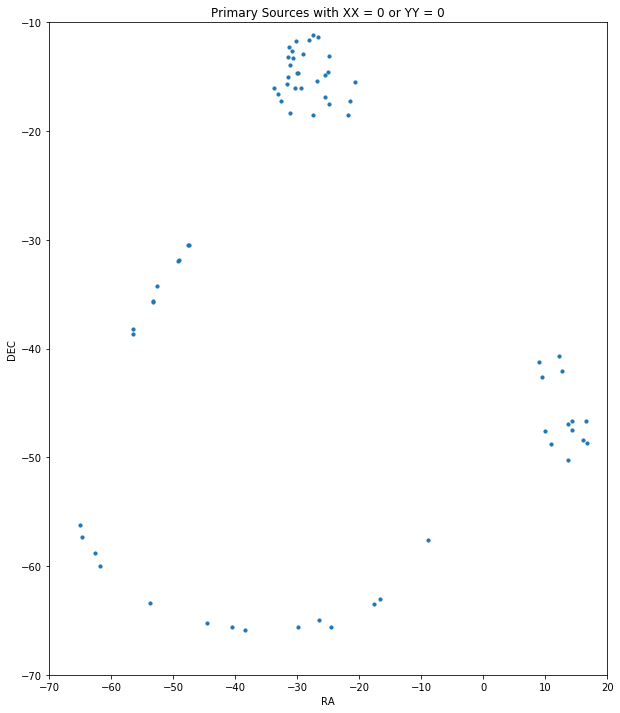

In [289]:

plt.figure(figsize=(10,12))
plt.scatter(tha_zero_ra,tha_zero_dec,s=10)
plt.xlim(-70,20)
plt.ylim(-70,-10)
plt.title('Primary Sources with XX = 0 or YY = 0')
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.colorbar()
plt.show()

In [306]:
all_ra = []
all_dec = []
intensity_all = []
xx_all = []
yy_all = []

for i in range(len(data['source_array'])):
    all_ra.append(data['source_array'][i]['ra'])
    all_dec.append(data['source_array'][i]['dec'])
    intensity_all.append(data['source_array'][i]['flux']['i'])
    xx_all.append(data['source_array'][i]['flux']['xx'])
    yy_all.append(data['source_array'][i]['flux']['yy'])
    
'''                      
plt.figure(figsize=(10,12))
plt.scatter(all_ra,all_dec,s=10)
plt.xlim(-70,20)
plt.ylim(-70,-10)
plt.title('All Sources')
plt.xlabel('RA')
plt.ylabel('DEC')
#plt.colorbar()
plt.show()
'''

"                      \nplt.figure(figsize=(10,12))\nplt.scatter(all_ra,all_dec,s=10)\nplt.xlim(-70,20)\nplt.ylim(-70,-10)\nplt.title('All Sources')\nplt.xlabel('RA')\nplt.ylabel('DEC')\n#plt.colorbar()\nplt.show()\n"

In [303]:
plt.figure(figsize=(18,10))
plt.suptitle('ObsID 1131709192')

plt.subplot2grid((1,2),(0,0))
plt.scatter(tha_zero_ra,tha_zero_dec,c=tha_i_zero,s=10,vmax=4)
plt.xlim(-70,20)
plt.ylim(-70,-10)
plt.title('Primary Sources with XX = 0 or YY = 0')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot2grid((1,2),(0,1))
plt.scatter(all_ra,all_dec,c=intensity_all,s=10,vmax=4)
plt.xlim(-70,20)
plt.ylim(-70,-10)
plt.title('All Sources')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

#plt.show()
#plt.savefig('1131709192xxyycolor.png')